In [12]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import networkx as nx

# Functions

In [13]:
def create_neurons(G: nx.Graph, X: np.ndarray, m: int, n: int, verbose: bool = False) -> nx.Graph:

    X_min_x = min(X[:, 0])
    X_max_x = max(X[:, 0])

    X_min_y = min(X[:, 1])
    X_max_y = max(X[:, 1])

    if verbose:
        print(X_min_x, X_min_y)
        print(X_max_x, X_max_y)

    for i in range(m * n):

        pos_x = np.random.uniform(X_min_x, X_max_x)
        pos_y = np.random.uniform(X_min_y, X_max_y)

        if verbose:
            print(f"Add node {i} with pos = [{pos_x}, {pos_y}]")

        G.add_node(i, pos = [pos_x, pos_y])

    return G

In [14]:
def distancia_euclidiana(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    return np.sqrt(
        np.sum(
            (X - y) ** 2
            )
        )

In [15]:
def calc_distance_from_nodes(dot: np.ndarray) -> list:

    """Gets the distance from every node to the point and sorts by the closest"""

    distances = {}

    for n in G.nodes():

        distances[n] = distancia_euclidiana(G.nodes()[n]["pos"], dot)

    distances = sorted(distances.items(), key = lambda x: x[1])

    return distances

In [16]:
def funcao_vizinhanca(first, neighbor) -> np.ndarray:

    peso_first = G.nodes()[first]["pos"]
    peso_neighbor = G.nodes()[neighbor]["pos"]

    print(f"            Peso_first: {peso_first}")
    print(f"            Peso_neighbor: {peso_neighbor}")

    result = 1 / (1 + distancia_euclidiana(peso_first, peso_neighbor)) ** 2

    print(f"            Result = {result}")

    return result

In [17]:
def update_peso(first: int, dot: np.ndarray, lr0: float, sigma0: float) -> None:

    print(f"        Sigam0: {sigma0}"
          f"        lr0: {lr0}")

    peso_atual = G.nodes()[first]["pos"]

    print(f"        Peso_atual: {peso_atual}")

    # peso = peso_atual + aprendizado * funcao de vizinhanca * (dot - peso_atual)
    G.nodes()[first]["pos"] = peso_atual + lr0 * (dot - peso_atual)

    print(f"        Peso_novo: {G.nodes()[first]["pos"]}")

    # Get the sigma0 closest neighbors
    distances_from_best = calc_distance_from_nodes(G.nodes()[first]["pos"])

    neighbors_sigma0 = [n for n, _ in distances_from_best[:sigma0]]

    # Update weights for the neighbors, using funcao_vizinhanca
    for n in neighbors_sigma0:

        peso_atual = G.nodes()[n]["pos"]

        G.nodes()[n]["pos"] = peso_atual + lr0 * funcao_vizinhanca(first, n) * (dot - peso_atual)

        print("\n")

In [18]:
def plot_over_data(G, X, step=None):
    fig, ax = plt.subplots()

    # scatter points
    ax.scatter(X[:, 0], X[:, 1], s=2)

    # node positions
    pos = {i: G.nodes[i]["pos"] for i in G.nodes}

    # draw graph explicitly on this axis
    nx.draw_networkx(
        G, pos,
        ax=ax,
        with_labels=True,
        font_size=8,
        node_size=100,
        edgecolors='black'
    )

    # build title
    title = "SOM over Data"
    if step is not None:
        title += f" - {step} Steps"
    else:
        ax.set_axis_on()
        # ax.set_aspect("equal")
        ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    # re-apply title and layout
    ax.set_title(title)
    fig.tight_layout()  # <- ensures title isn’t cut off
    plt.show()


In [19]:
# def som_train(X: np.ndarray, m: int, n: int, lr0: float, sigma0: float, steps: int, seed: int):
#
#     np.random.seed(seed)
#
#     raise NotImplementedError

# Data

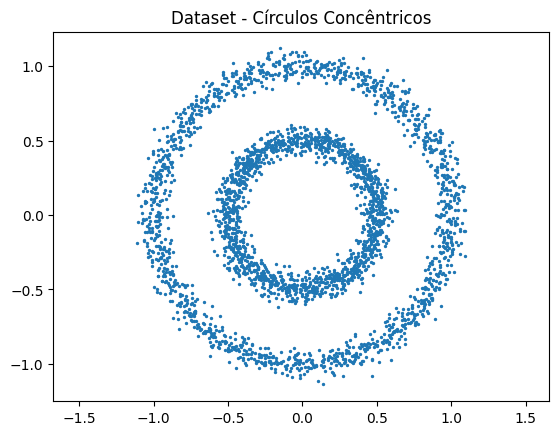

In [20]:
X, _ = make_circles(n_samples = 3000, factor = 0.5, noise = 0.05)
plt.scatter(X[:, 0], X[:, 1], s = 2)
plt.axis('equal')
plt.title("Dataset - Círculos Concêntricos")
plt.show()

# SOM

* Seleciona aleatoriamente um vetor x do conjunto X;
* Encontra o neurônio vencedor (BMU) — o mais próximo de x;
* Atualiza o BMU e seus vizinhos:

Wi,j(t + 1) = Wi,j(t) + n(t) hci(t) [X − Wi,j(t)]

onde:
* n(t)= taxa de aprendizado decaindo com o tempo (lr0);
* ℎci(t)= função de vizinhança Gaussiana com raio σ(t);
* Reduz gradualmente lr e σ a cada iteração (controlando o refinamento);
* Após steps iterações, o mapa se estabiliza — os neurônios formam uma malha que se ajusta à topologia dos dados.

In [21]:
# Parâmetros do algoritmo SOM

m, n = 10, 10
lr0 = 0.05
sigma0 = max(m, n) // 2
steps = 8000
seed = 11

# W = som_train(X, m, n, lr0, sigma0, steps, seed)

Step: 0
    Pos: 2923
    Dot: [ 0.27113658 -0.36270546]
    Best neuron: 25
        Sigam0: 5        lr0: 0.05
        Peso_atual: [0.24830784256309713, -0.32299236392462893]
        Peso_novo: [ 0.24944928 -0.32497802]
            Peso_first: [ 0.24944928 -0.32497802]
            Peso_neighbor: [ 0.24944928 -0.32497802]
            Result = 1.0


            Peso_first: [ 0.25053364 -0.32686439]
            Peso_neighbor: [0.23863160520883486, -0.3135402696178221]
            Result = 0.9652034410373267


            Peso_first: [ 0.25053364 -0.32686439]
            Peso_neighbor: [0.24378989454158995, -0.43348087200016827]
            Result = 0.8162787878569415


            Peso_first: [ 0.25053364 -0.32686439]
            Peso_neighbor: [0.11705868012239073, -0.3118311015934434]
            Result = 0.7771944065975023


            Peso_first: [ 0.25053364 -0.32686439]
            Peso_neighbor: [0.37508876914989764, -0.5782552956603706]
            Result = 0.6098221787573754




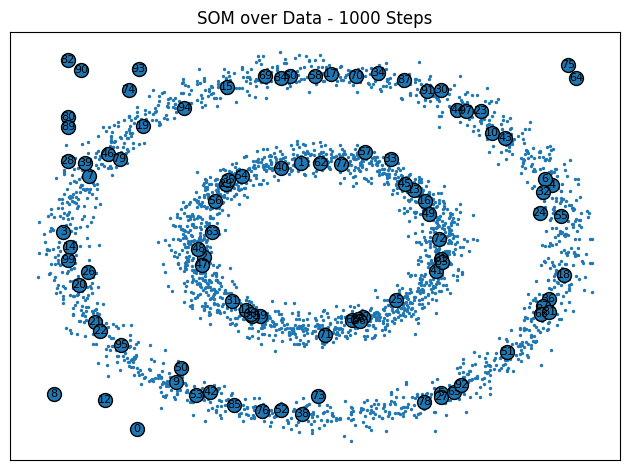

Step: 1000
    Pos: 245
    Dot: [ 0.82524223 -0.43862372]
    Best neuron: 68
        Sigam0: 2        lr0: 0.0475
        Peso_atual: [ 0.89328633 -0.40176564]
        Peso_novo: [ 0.89005424 -0.4035164 ]
            Peso_first: [ 0.89005424 -0.4035164 ]
            Peso_neighbor: [ 0.89005424 -0.4035164 ]
            Result = 1.0


            Peso_first: [ 0.88697567 -0.405184  ]
            Peso_neighbor: [ 0.9251039  -0.39030246]
            Result = 0.9229058142422807


Step: 1001
    Pos: 1604
    Dot: [-0.66079086 -0.66343872]
    Best neuron: 50
        Sigam0: 2        lr0: 0.0475
        Peso_atual: [-0.54104831 -0.71913177]
        Peso_novo: [-0.54673608 -0.71648635]
            Peso_first: [-0.54673608 -0.71648635]
            Peso_neighbor: [-0.54673608 -0.71648635]
            Result = 1.0


            Peso_first: [-0.55215368 -0.71396659]
            Peso_neighbor: [-0.56118165 -0.80061059]
            Result = 0.8461562371152738


Step: 1002
    Pos: 2158
    Dot: [

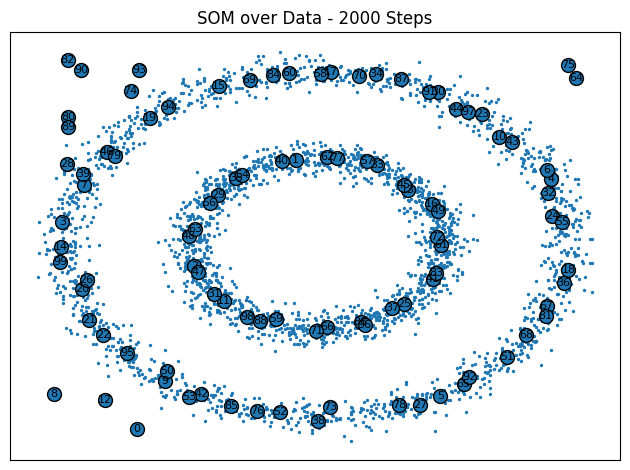

Step: 2000
    Pos: 2674
    Dot: [ 0.2697735  -0.47823747]
    Best neuron: 96
        Sigam0: 1        lr0: 0.045125
        Peso_atual: [ 0.18928754 -0.46866596]
        Peso_novo: [ 0.19291947 -0.46909788]
            Peso_first: [ 0.19291947 -0.46909788]
            Peso_neighbor: [ 0.19291947 -0.46909788]
            Result = 1.0


Step: 2001
    Pos: 1395
    Dot: [-0.93192546 -0.21244109]
    Best neuron: 26
        Sigam0: 1        lr0: 0.045125
        Peso_atual: [-0.91603296 -0.20916823]
        Peso_novo: [-0.91675011 -0.20931592]
            Peso_first: [-0.91675011 -0.20931592]
            Peso_neighbor: [-0.91675011 -0.20931592]
            Result = 1.0


Step: 2002
    Pos: 1558
    Dot: [0.32109499 0.38998866]
    Best neuron: 45
        Sigam0: 1        lr0: 0.045125
        Peso_atual: [0.34495423 0.34729432]
        Peso_novo: [0.34387759 0.3492209 ]
            Peso_first: [0.34387759 0.3492209 ]
            Peso_neighbor: [0.34387759 0.3492209 ]
            Resul

Step: 3000
    Pos: 1086
    Dot: [0.53349801 0.0080103 ]
    Best neuron: 61
        Sigam0: 0        lr0: 0.04286875
        Peso_atual: [ 0.50996404 -0.01854522]
        Peso_novo: [ 0.51097292 -0.01740682]
Step: 3001
    Pos: 925
    Dot: [-0.89177265 -0.39575948]
    Best neuron: 21
        Sigam0: 0        lr0: 0.04286875
        Peso_atual: [-0.91352864 -0.42341659]
        Peso_novo: [-0.91259599 -0.42223096]
Step: 3002
    Pos: 2799
    Dot: [-0.38857471  0.18355456]
    Best neuron: 56
        Sigam0: 0        lr0: 0.04286875
        Peso_atual: [-0.43157308  0.22314847]
        Peso_novo: [-0.42972979  0.22145113]
Step: 3003
    Pos: 977
    Dot: [0.53465342 0.11372463]
    Best neuron: 49
        Sigam0: 0        lr0: 0.04286875
        Peso_atual: [0.50434016 0.16923183]
        Peso_novo: [0.50563965 0.1668523 ]
Step: 3004
    Pos: 2865
    Dot: [-0.28739458 -0.89686594]
    Best neuron: 85
        Sigam0: 0        lr0: 0.04286875
        Peso_atual: [-0.35628179 -0.93478

Step: 4000
    Pos: 2661
    Dot: [-0.58378319  0.84822803]
    Best neuron: 94
        Sigam0: 0        lr0: 0.04072531249999999
        Peso_atual: [-0.58023288  0.80347743]
        Peso_novo: [-0.58037746  0.80529991]
Step: 4001
    Pos: 2870
    Dot: [ 0.0706377  -0.48947423]
    Best neuron: 66
        Sigam0: 0        lr0: 0.04072531249999999
        Peso_atual: [ 0.05817406 -0.48840426]
        Peso_novo: [ 0.05868165 -0.48844783]
Step: 4002
    Pos: 134
    Dot: [0.53097046 0.89988195]
    Best neuron: 30
        Sigam0: 0        lr0: 0.04072531249999999
        Peso_atual: [0.49789753 0.88069738]
        Peso_novo: [0.49924443 0.88147868]
Step: 4003
    Pos: 2816
    Dot: [-0.1137111 -1.0370779]
    Best neuron: 52
        Sigam0: 0        lr0: 0.04072531249999999
        Peso_atual: [-0.13240132 -0.98229063]
        Peso_novo: [-0.13164015 -0.98452186]
Step: 4004
    Pos: 156
    Dot: [-0.31185272  0.43885387]
    Best neuron: 54
        Sigam0: 0        lr0: 0.04072531249999

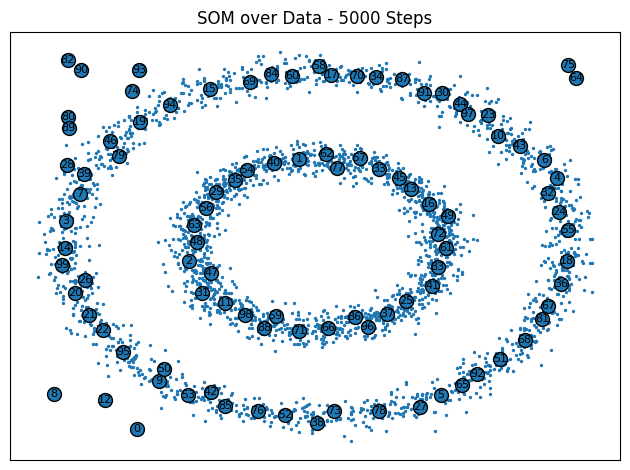

Step: 5000
    Pos: 1515
    Dot: [-0.70918783 -0.7602728 ]
    Best neuron: 9
        Sigam0: 0        lr0: 0.038689046874999994
        Peso_atual: [-0.62765984 -0.79350664]
        Peso_novo: [-0.63081408 -0.79222086]
Step: 5001
    Pos: 442
    Dot: [-0.10935839 -0.51030307]
    Best neuron: 71
        Sigam0: 0        lr0: 0.038689046874999994
        Peso_atual: [-0.07049644 -0.50256088]
        Peso_novo: [-0.07199998 -0.50286042]
Step: 5002
    Pos: 1419
    Dot: [-0.08428943 -0.43295769]
    Best neuron: 71
        Sigam0: 0        lr0: 0.038689046874999994
        Peso_atual: [-0.07199998 -0.50286042]
        Peso_novo: [-0.07247544 -0.50015595]
Step: 5003
    Pos: 1944
    Dot: [-0.05233253 -0.94162492]
    Best neuron: 52
        Sigam0: 0        lr0: 0.038689046874999994
        Peso_atual: [-0.12659585 -0.99079721]
        Peso_novo: [-0.12372267 -0.98889478]
Step: 5004
    Pos: 2075
    Dot: [1.01651968 0.21102404]
    Best neuron: 24
        Sigam0: 0        lr0: 0.0386

Step: 6000
    Pos: 175
    Dot: [-0.39341271 -0.21545357]
    Best neuron: 47
        Sigam0: 0        lr0: 0.03675459453124999
        Peso_atual: [-0.43078298 -0.16888029]
        Peso_novo: [-0.42940945 -0.17059207]
Step: 6001
    Pos: 1736
    Dot: [-0.21778215 -0.98254602]
    Best neuron: 76
        Sigam0: 0        lr0: 0.03675459453124999
        Peso_atual: [-0.23275578 -0.96432776]
        Peso_novo: [-0.23220543 -0.96499736]
Step: 6002
    Pos: 636
    Dot: [ 0.12361197 -0.44891626]
    Best neuron: 86
        Sigam0: 0        lr0: 0.03675459453124999
        Peso_atual: [ 0.14254934 -0.41845267]
        Peso_novo: [ 0.14185331 -0.41957235]
Step: 6003
    Pos: 367
    Dot: [0.78259648 0.6132173 ]
    Best neuron: 43
        Sigam0: 0        lr0: 0.03675459453124999
        Peso_atual: [0.80345394 0.56823141]
        Peso_novo: [0.80268733 0.56988485]
Step: 6004
    Pos: 2573
    Dot: [ 0.01868179 -0.59832511]
    Best neuron: 66
        Sigam0: 0        lr0: 0.0367545945312

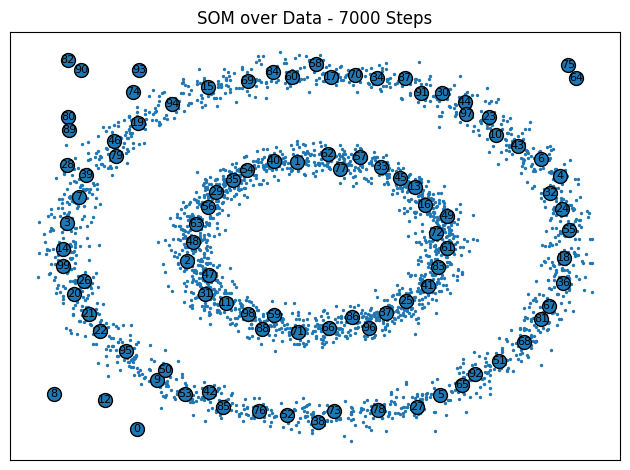

Step: 7000
    Pos: 362
    Dot: [0.2683306 0.3512662]
    Best neuron: 45
        Sigam0: 0        lr0: 0.03491686480468749
        Peso_atual: [0.3312247  0.38421629]
        Peso_novo: [0.32902864 0.38306577]
Step: 7001
    Pos: 53
    Dot: [-0.03650071 -0.56000448]
    Best neuron: 71
        Sigam0: 0        lr0: 0.03491686480468749
        Peso_atual: [-0.07710448 -0.50624958]
        Peso_novo: [-0.07568673 -0.50812653]
Step: 7002
    Pos: 2635
    Dot: [-0.91101473 -0.29182267]
    Best neuron: 20
        Sigam0: 0        lr0: 0.03491686480468749
        Peso_atual: [-0.96652632 -0.28748277]
        Peso_novo: [-0.96458803 -0.2876343 ]
Step: 7003
    Pos: 2574
    Dot: [ 0.2692084  -0.96557173]
    Best neuron: 78
        Sigam0: 0        lr0: 0.03491686480468749
        Peso_atual: [ 0.24478413 -0.96166021]
        Peso_novo: [ 0.24563695 -0.96179679]
Step: 7004
    Pos: 407
    Dot: [-0.18741569  0.51811424]
    Best neuron: 40
        Sigam0: 0        lr0: 0.0349168648046874

In [22]:
np.random.seed(seed)

G = nx.Graph()

G = create_neurons(G, X, m, n)

step = 0

while step < steps:

    print(f"Step: {step}")

    pos = np.random.randint(X.shape[0])

    print(f"    Pos: {pos}")

    dot = X[pos]

    print(f"    Dot: {dot}")

    distances = calc_distance_from_nodes(dot)

    best_neuron = distances[0][0]

    print(f"    Best neuron: {best_neuron}")

    update_peso(best_neuron, dot, lr0, sigma0)

    step += 1

    if step % 1000 == 0:
        print(f"Step {step}")
        lr0 *= 0.95   # decay 5%
        sigma0 *= 0.5 # decay 10%
        sigma0 = round(sigma0)
        plot_over_data(G, X, step)


plot_over_data(G, X)